# Example of usage of `psda` package
Final assignment in Data in Python course, Spring 2021

1. Calculate in Python basic statistics like min/average/max number of students per teacher in one school, broken down by the type of school
* in each district (polish ‘gmina’)
* and in total for cities and rural districts.
2. Calculate in Python basic statistics like min/average/max number of students per school broken down by their year of birth, in total for cities and rural districts

### Importing `psda` library

In [1]:
from psda.io_data.input import (
    excel_to_df_school,
    excel_to_df_population
)
from psda.io_data.output import (
    output_csv,
    output_report
)
from psda.process.fix_data import fix_school
from psda.process.process_data import (
    create_dict_of_districts,
    compute_ratio,
    compute_students_per_school,
    process_school
)
from psda.stats.compute import (
    stat_students_per_school,
    stat_students_per_teacher
)

### Input data

In [2]:
path_to_school_data = "./data/wykaz_placowek.xlsx"
path_to_population_data = "./data/tabela12.xls"

In [3]:
df_schools = excel_to_df_school(path_to_school_data)

In [4]:
df_population = excel_to_df_population(path_to_population_data)

### Fixing inconsistency in data & processing data

In [5]:
dict_of_districts = create_dict_of_districts(df_population)

In [6]:
df_schools_fixed = fix_school(df_schools, dict_of_districts)

In [7]:
df_schools_processed = process_school(df_schools_fixed, dict_of_districts)

### Computing statistics

In [8]:
students_total = df_schools.students.sum()
students_processed = df_schools_processed.students.sum()
frac_of_students_dropped = 1 - (students_processed / students_total)

In [9]:
spt1 = stat_students_per_teacher(df_schools_processed, ["district_type", "school_type"])

In [10]:
spt2 = stat_students_per_teacher(df_schools_processed, ["voivo", "county", "district", "school_type"])

In [11]:
sps = stat_students_per_school(df_schools_processed, ["district_type"])

### Output

In [12]:
output_csv(spt1, "stat_students_per_teacher_by_district_type_school_type")
output_csv(spt2, "stat_students_per_teacher_by_voivodeship_county_district_school_type")
output_csv(sps, "stat_students_per_school_by_district_type_year")
output_report(df_schools, df_schools_processed, "report")

## Some plots

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

1. min/average/max number of students per teacher in one school, broken down by the type of school in total for cities and rural districts.

In [14]:
spt1

min_ratio  max_ratio  avg_ratio
district_type school_type                                             
Gm            Gimnazjum                 0.250000       30.0   6.288827
              Liceum ogólnokształcące   0.750000      160.0   8.603257
              Przedszkole               0.400000       72.0   9.936905
              Szkoła podstawowa         0.294118       37.0   6.610224
              Technikum                 0.576923       46.0   6.641815
M             Gimnazjum                 0.133333      141.0   4.741357
              Liceum ogólnokształcące   0.111111      222.5  11.565843
              Przedszkole               0.333333      141.0   8.872429
              Szkoła podstawowa         0.090909      124.0   7.491041
              Technikum                 0.200000       37.0   8.422549
M-Gm          Gimnazjum                 0.090909       32.0   6.020560
              Liceum ogólnokształcące   0.333333      106.0   9.220284
              Przedszkole               0.333333       99.0   9.657828
              Szkoła podstawowa         0.125000       73.0   6.838552
              Technikum                 0.500000       88.0   8.539400

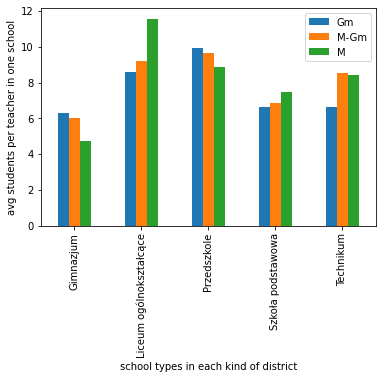

In [15]:
a = spt1["avg_ratio"].xs("Gm")
b = spt1["avg_ratio"].xs("M-Gm")
c = spt1["avg_ratio"].xs("M")
combined = pd.concat([a, b, c], axis=1)
combined.plot.bar()
plt.legend(["Gm", "M-Gm", "M"])
plt.xlabel("school types in each kind of district")
plt.ylabel("avg students per teacher in one school")
plt.show()

2. min/max/avg number of students per school broken down by their year of birth, in total for
* cities (M)
* districts with city and village (M-Gm)
* rural districts (Gm)

In [16]:
sps

min              max                      avg             \
district_type   Gm    M M-Gm     Gm      M   M-Gm         Gm          M   
1999           3.0  1.0  2.0  138.0  353.0  228.0  36.377907  81.794296   
2000           1.0  1.0  1.0  144.0  863.0  248.0  30.816156  74.447168   
2001           1.0  1.0  1.0  140.0  782.0  246.0  30.627778  73.887010   
2002           1.0  1.0  1.0  156.0  727.0  236.0  30.005556  73.105664   
2003           2.0  1.0  1.0  128.0  310.0  182.0  38.118834  45.238872   
2004           1.0  1.0  1.0  178.0  185.0  225.0  20.297879  43.599951   
2005           1.0  1.0  1.0  174.0  197.0  246.0  20.868953  45.398836   
2006           1.0  1.0  1.0  180.0  216.0  266.0  22.004803  46.392528   
2007           1.0  1.0  1.0  188.0  228.0  266.0  23.148228  48.836487   
2008           1.0  1.0  1.0  208.0  245.0  293.0  24.493541  52.550218   
2009           1.0  1.0  1.0  212.0  256.0  297.0  24.349619  53.458758   
2010           1.0  1.0  1.0  205.0  257.0  287.0  23.223915  51.645560   
2011           1.0  1.0  1.0  189.0  245.0  262.0  22.273555  49.665939   
2012           1.0  1.0  1.0  116.0  139.0  145.0  18.796910  25.402813   
2013           1.0  1.0  1.0  124.0  139.0  148.0  17.782105  24.425654   
2014           1.0  1.0  1.0  112.0  137.0  152.0  17.947216  25.003328   
2015           1.0  1.0  1.0  110.0  159.0  145.0  17.637914  25.153683   

                          
district_type       M-Gm  
1999           53.341131  
2000           45.250945  
2001           44.329554  
2002           42.624339  
2003           43.252033  
2004           27.180296  
2005           27.798493  
2006           29.088194  
2007           30.701088  
2008           32.783422  
2009           32.716439  
2010           31.032375  
2011           29.613452  
2012           23.982130  
2013           22.850335  
2014           23.056962  
2015           22.696203

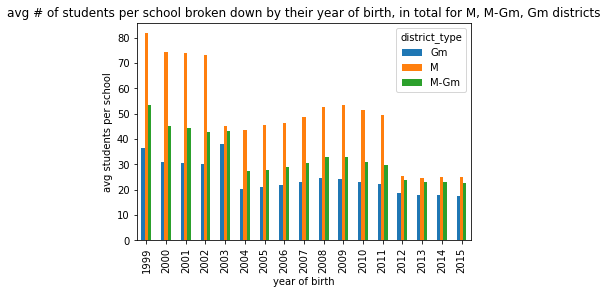

In [17]:
sps["avg"].plot.bar()
plt.title("avg # of students per school broken down by their year of birth, in total for M, M-Gm, Gm districts")
plt.xlabel("year of birth")
plt.ylabel("avg students per school")
plt.show()